In [76]:
# Python Project 2
### Question : What is the difference between peoples's race and gender with diabetes? Who is at a higher risk?

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv(r'Desktop/Data_analysis/NYPD_Hate_Crimes .csv')
df
df.head()
df.shape
df.describe()

###changing the index to encounter_id 
#check first if the ID is unique 
df['Full Complaint ID'].is_unique 
#it is true 

df = df.set_index('Full Complaint ID')

##

#Dropping Columns that are not needed/has NaN values 
drop_list = ['Other Motive Description','Arrest Date','Arrest Id']
df.drop(drop_list, inplace=True, axis=1)
df

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
Full Complaint ID,,,,,,,,,,,
201900112220917,2019,3,03/07/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
201900112125917,2019,1,01/24/2019,1,PATROL BORO MAN SOUTH,NEW YORK,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-JEWISH,Religion/Religious Practice
202100112173517,2021,3,03/06/2021,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-HISPANIC,Ethnicity/National Origin/Ancestry
201900112442817,2019,6,06/08/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MUSLIM,Religion/Religious Practice
201900112618217,2019,8,08/14/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-WHITE,Race/Color
...,...,...,...,...,...,...,...,...,...,...,...
201912212568117,2019,10,10/26/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color
201912212498017,2019,9,09/15/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
201912212334717,2019,6,06/10/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice


In [77]:
df.groupby(['Complaint Year Number'])['PD Code Description'].count() #more women have diabetes 54708 Women & 47055 Men

df.groupby(['Offense Category'])['County'].count()


Offense Category
Age                                     1
Disability                              1
Ethnicity/National Origin/Ancestry     30
Gender                                 35
Race/Color                            207
Religion/Religious Practice           451
Sexual Orientation                    107
Name: County, dtype: int64

<AxesSubplot:xlabel='count', ylabel='County'>

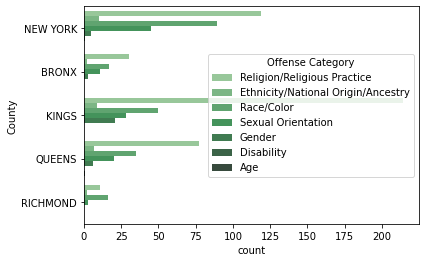

In [78]:
sns.countplot(y='County', hue='Offense Category', data=df, palette="Greens_d")

In [83]:
options = ['race/color'] 
    
# selecting rows based on condition 
df = df[(df['Complaint Year Number'] == 2020) & 
          df['Offense Category'].isin(options)] 
    
print('\nResult dataframe :\n',
      df)


Result dataframe :
 Empty DataFrame
Columns: [Complaint Year Number, Month Number, Record Create Date, Complaint Precinct Code, Patrol Borough Name, County, Law Code Category Description, Offense Description, PD Code Description, Bias Motive Description, Offense Category]
Index: []


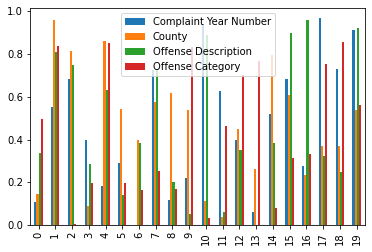

In [95]:
df2 = pd.DataFrame(np.random.rand(20, 4), columns=["Complaint Year Number", "County", "Offense Description", "Offense Category"])

df2.plot.bar();